# Portuguese Wine Quality Dataset 

This notebook processes a dataset of red and white wine physicochemical qualities and classifies wines based on their quality. The quality data is based on previous quality data obtained by sensory testing.(see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/). It also processes the two wine types separately, also calculates training and inference time based on different algorithms, features and dataset size.

## Previewing the Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

df1 = pd.read_csv('winequality-red.csv', sep = ';')
df2 = pd.read_csv('winequality-white.csv',sep = ';')

# Add new column to distinguish wine types after combining
df1['wine_type'] = 'red' 
df2['wine_type'] = 'white'
df1['wine_type'] = df1['wine_type'].map({'red': 0, 'white': 1})
df2['wine_type'] = df2['wine_type'].map({'red': 0, 'white': 1})

#Join both datasets
df = pd.concat([df1,df2])

df.head() # Preview 1st 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [2]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(6497, 13)
(1599, 13)
(4898, 13)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [4]:
df.isna().sum() # Checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [5]:
df.describe().round(2) # Summary statistics table 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00,1.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00


<Axes: >

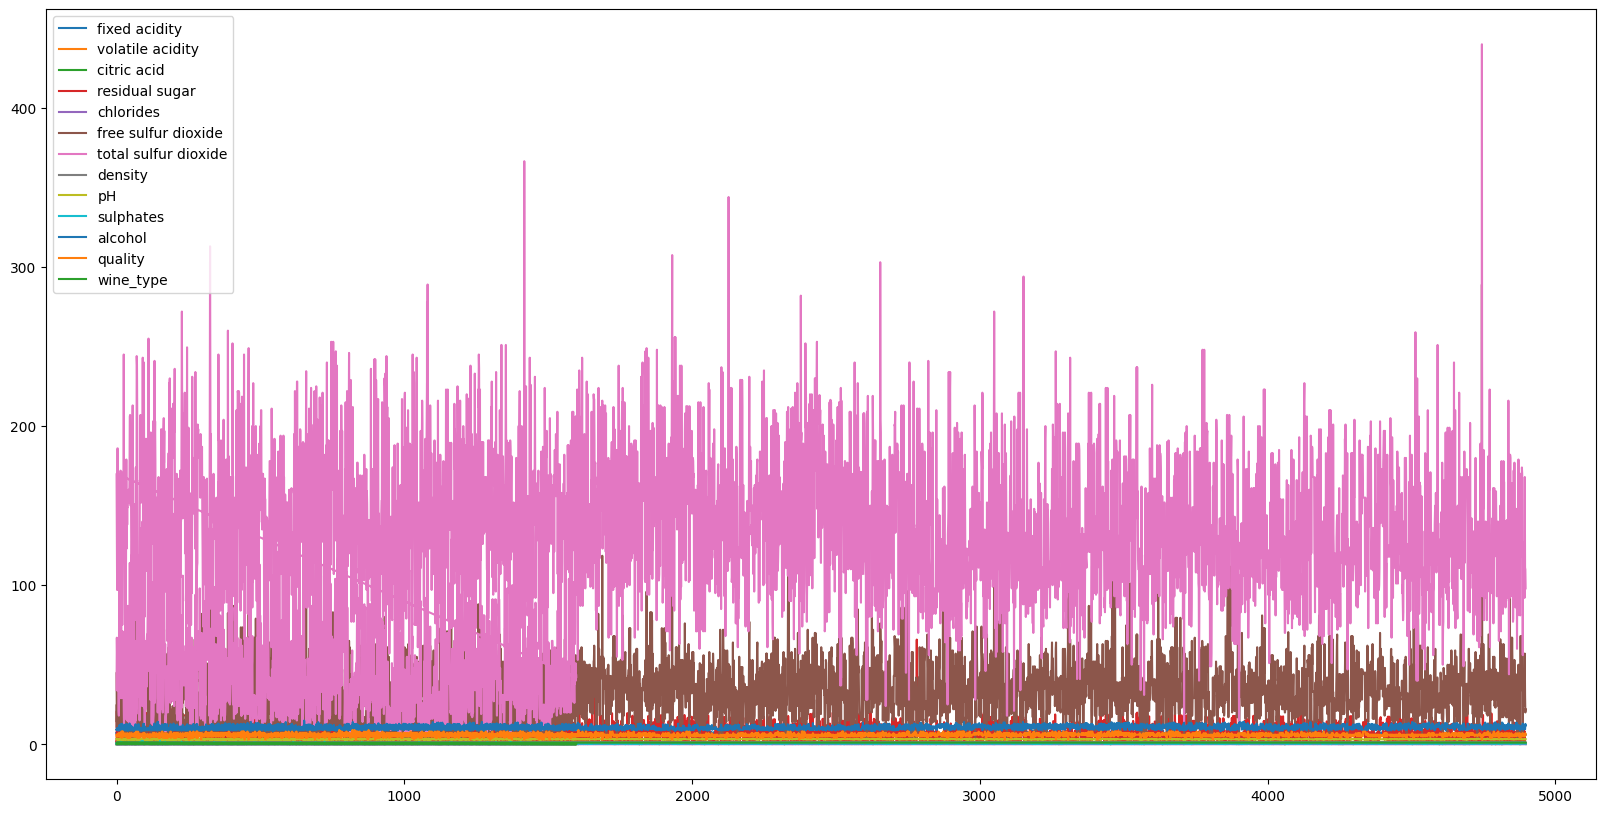

In [6]:
from matplotlib import pyplot as plt

df.plot(figsize = (20,10)) # Plot Dataset

<Axes: xlabel='wine_type'>

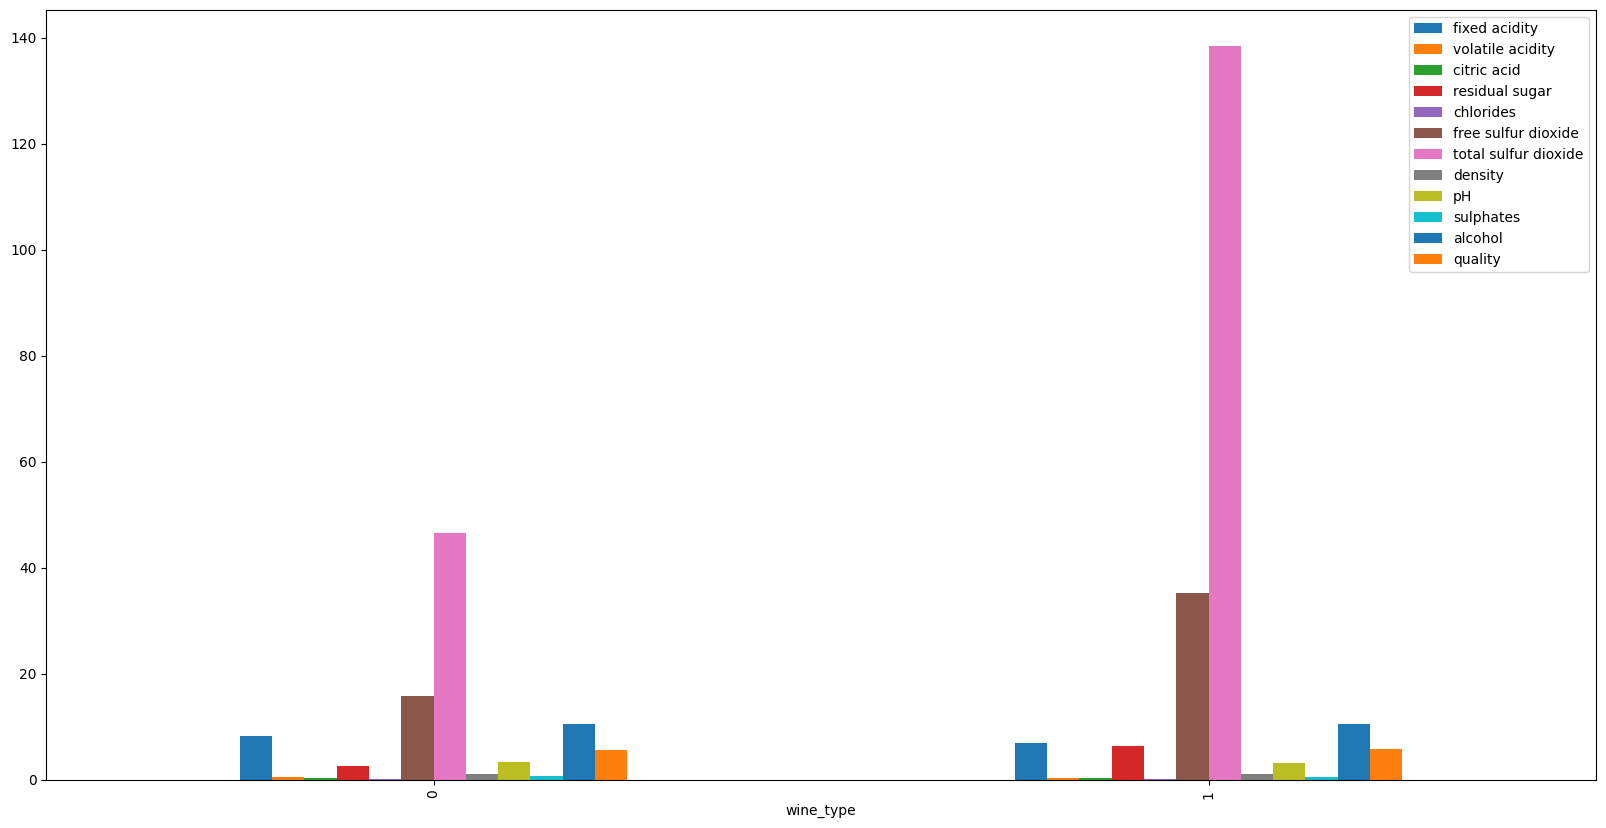

In [7]:
# Plot Grouped Data by Quality
df.groupby("wine_type").mean().plot(kind="bar",figsize=(20,10))

# 0 = Red Wine, 1 

Label: 0 = red wine, 1 = white wine
* Observing this plot, we can conclude that since the chemical properties are very different between the wine types, the two datasets **should not be processed togheter** since it can lead to lower accuracy later in the classification

<Axes: xlabel='quality'>

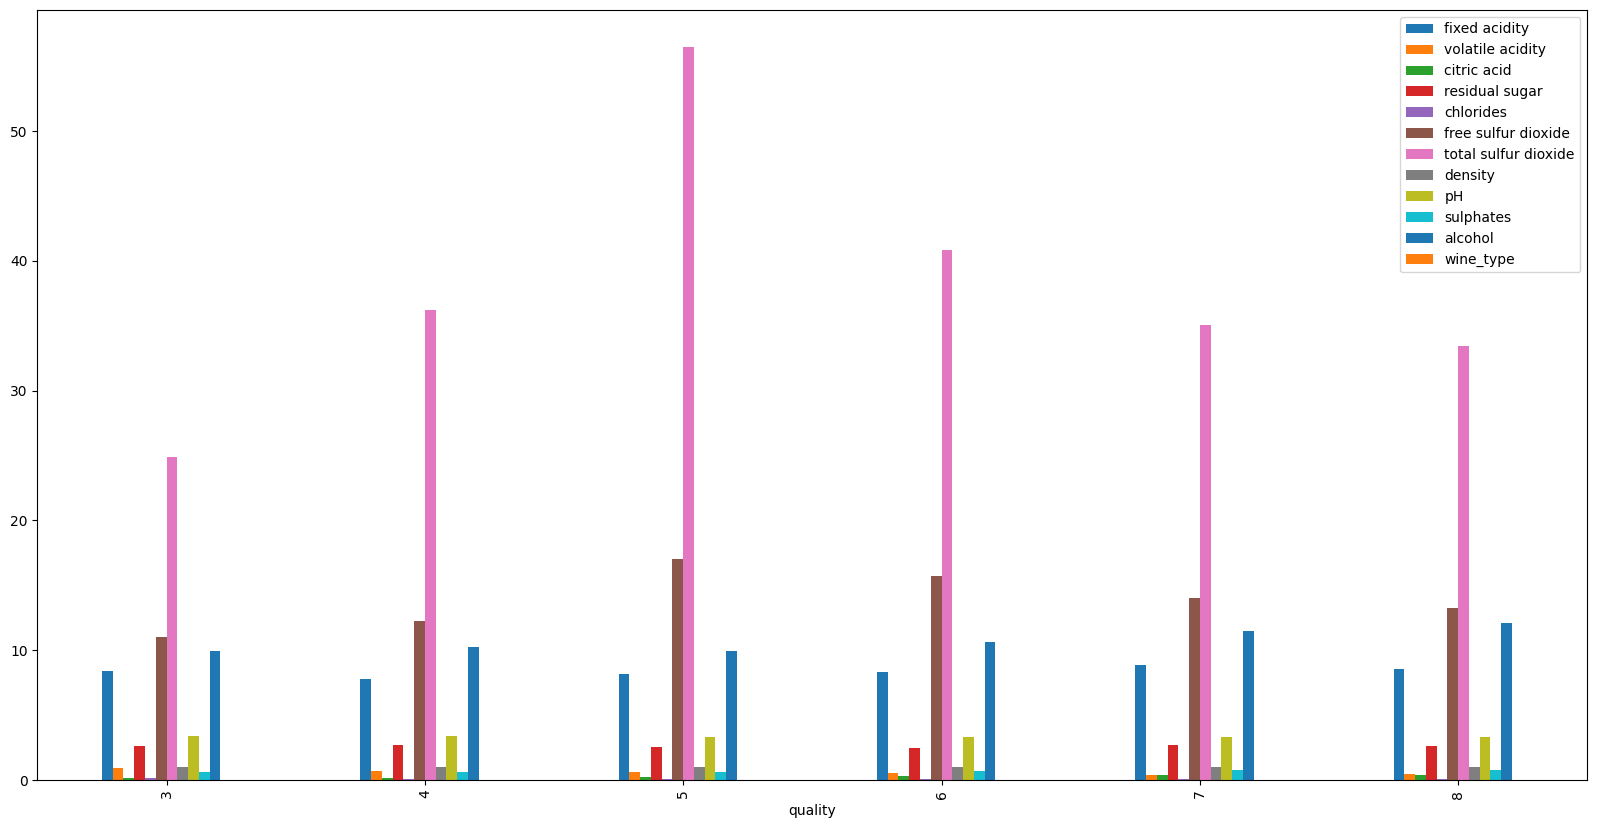

In [8]:
# Plot of Red Wine Grouped Data by Quality
df1.groupby("quality").mean().plot(kind="bar",figsize=(20,10))

<Axes: xlabel='quality'>

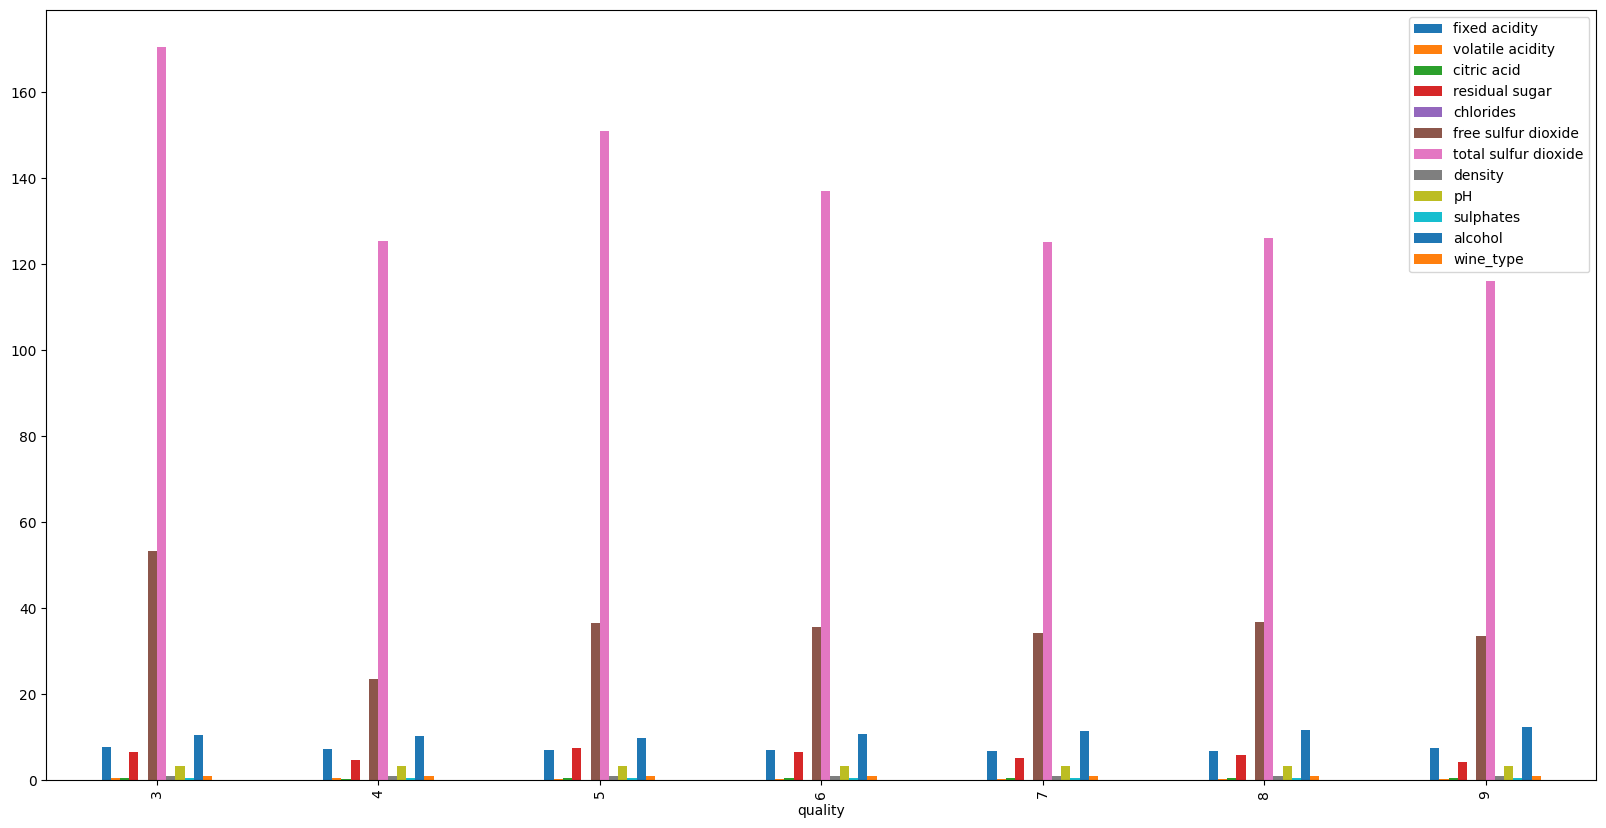

In [9]:
# Plot of White Wine Grouped Data by Quality
df2.groupby("quality").mean().plot(kind="bar",figsize=(20,10))

* Observing the distibution of the mean of wine chemicals along the different wine qualities, we can corroborate the previous conclusion, since both distributions vary a lot, again, **they should not be processed togheter**.

## Chemicals Effect on Wine Quality

### Red Wine

#### Plots of Feature Impact on Quality

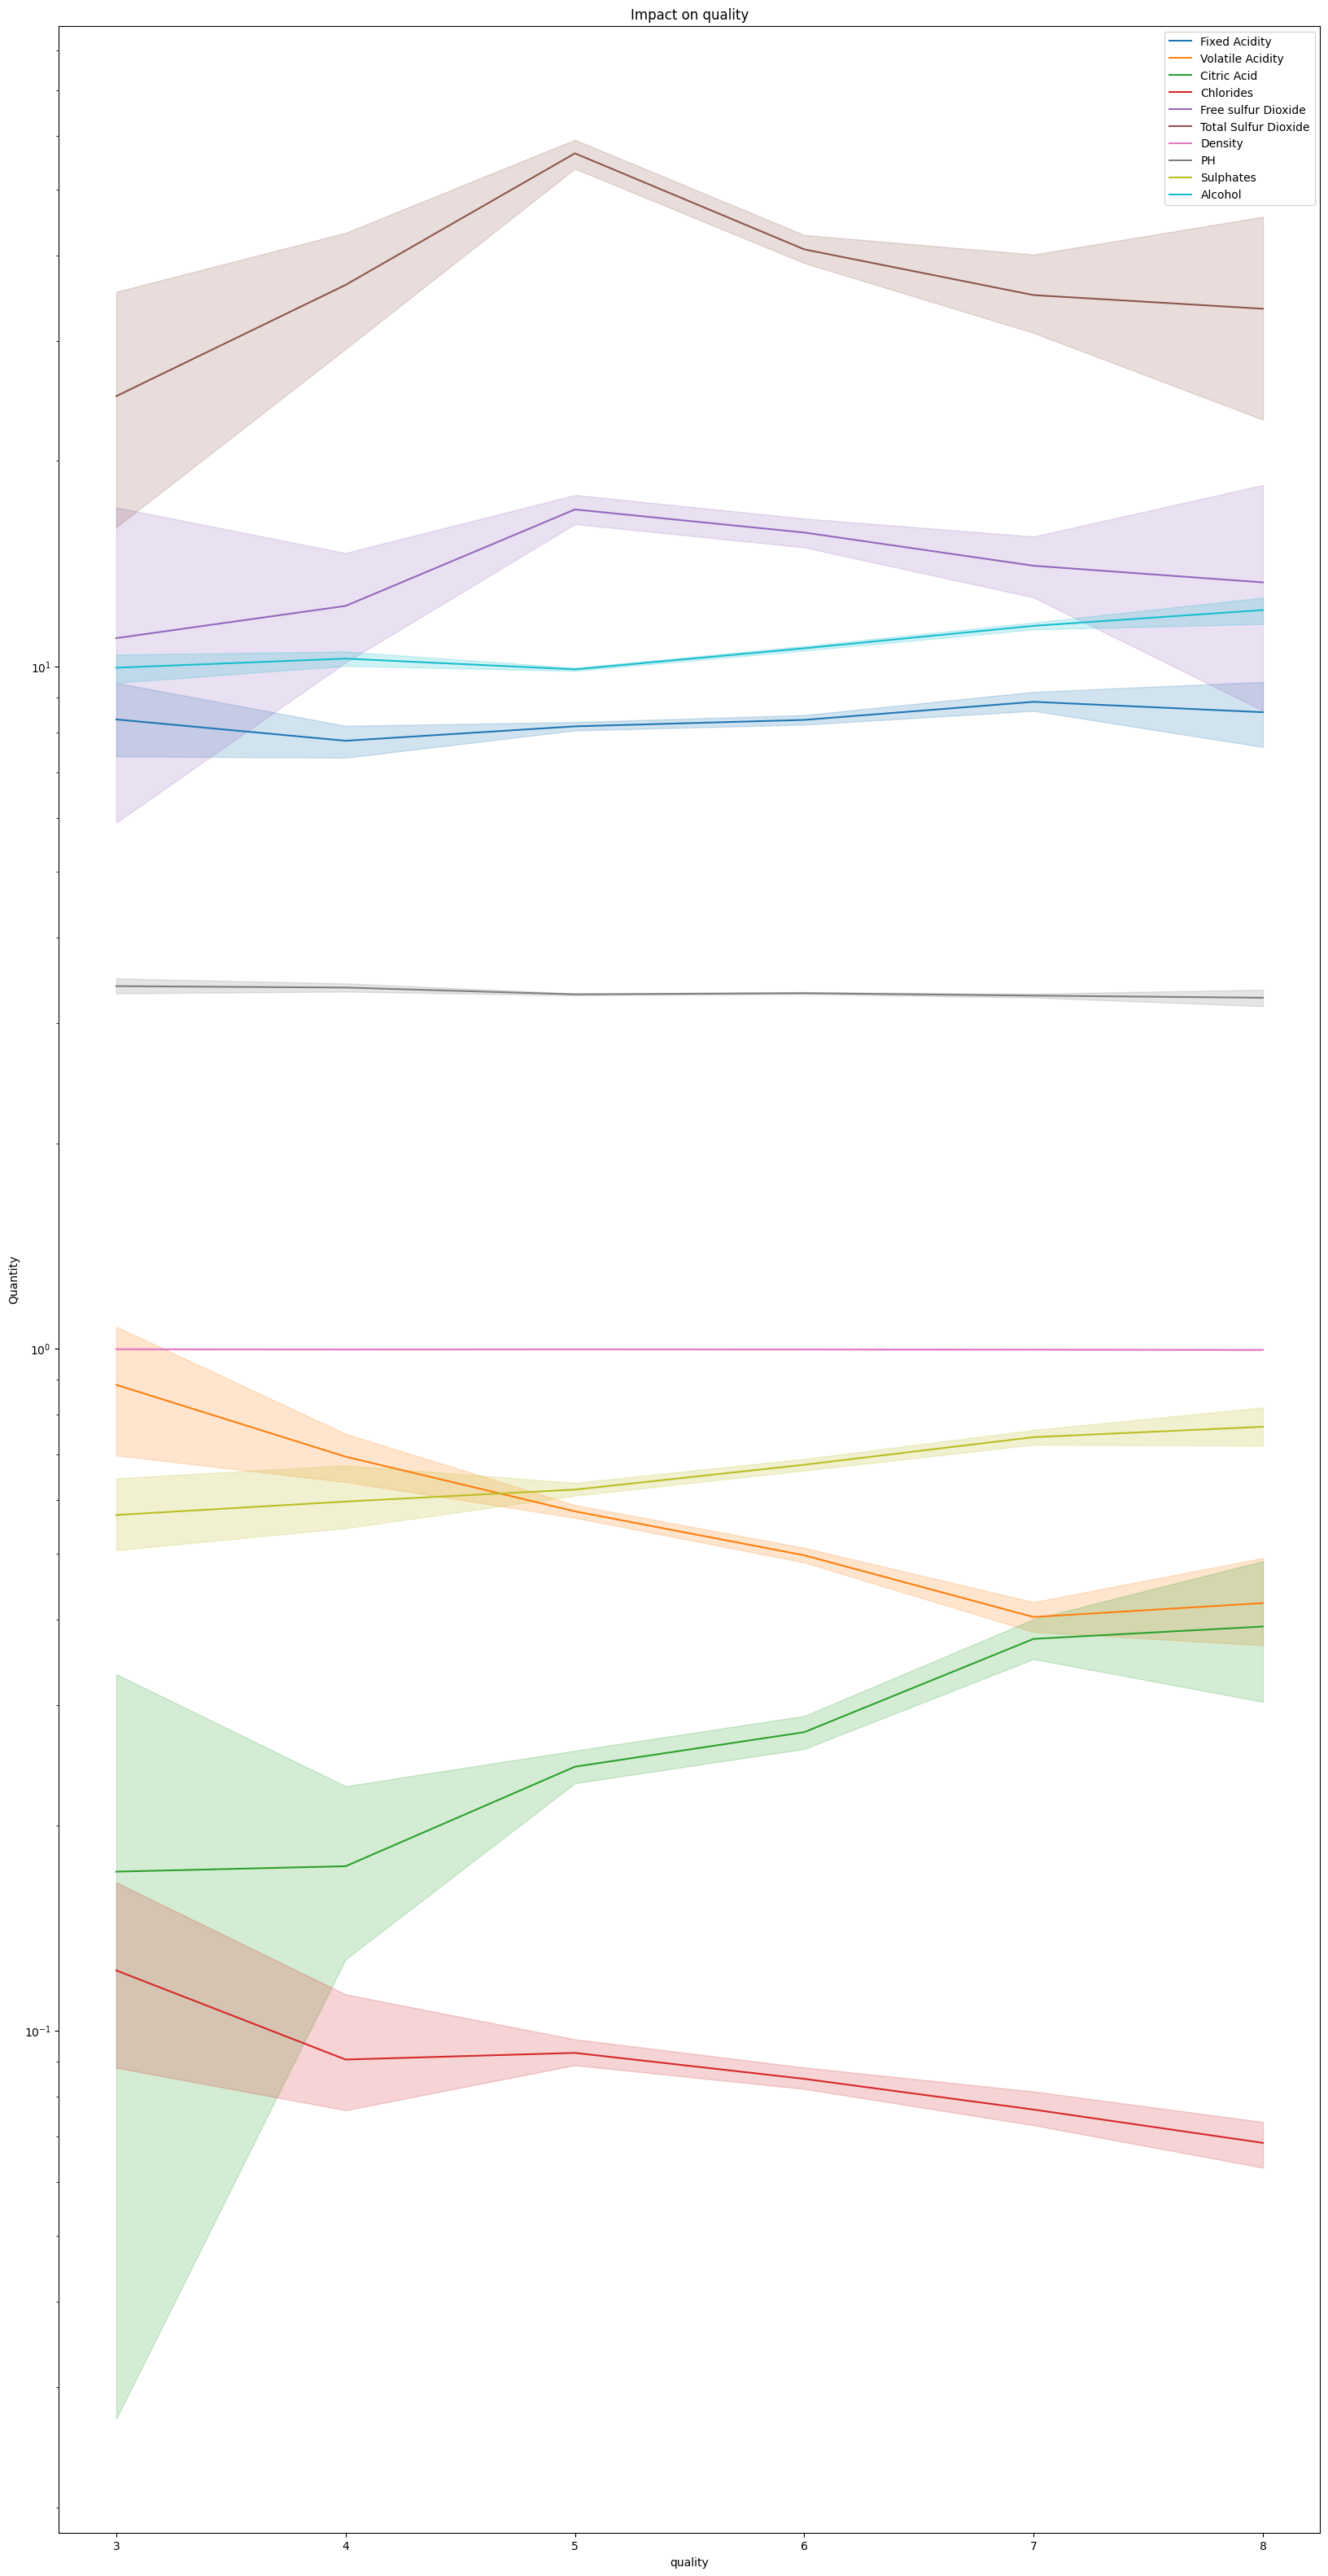

In [10]:
import seaborn as sns

plt.figure(figsize=(20,40))
sns.lineplot(data=df1, x="quality",y="fixed acidity",label="Fixed Acidity")
sns.lineplot(data=df1, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df1, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df1, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df1, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="density",label="Density")
sns.lineplot(data=df1, x="quality",y="pH",label="PH")
sns.lineplot(data=df1, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df1, x="quality",y="alcohol",label="Alcohol")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* On a quick analysis we can observe that *alchool*, *sulphates*, and *citric acid* may have a positive correlation with wine quality.
* On the other hand, *volatile acidity* and *chlorides* show a negative trend as quality increases.
* The other features show less variation or show no correlation with quality.

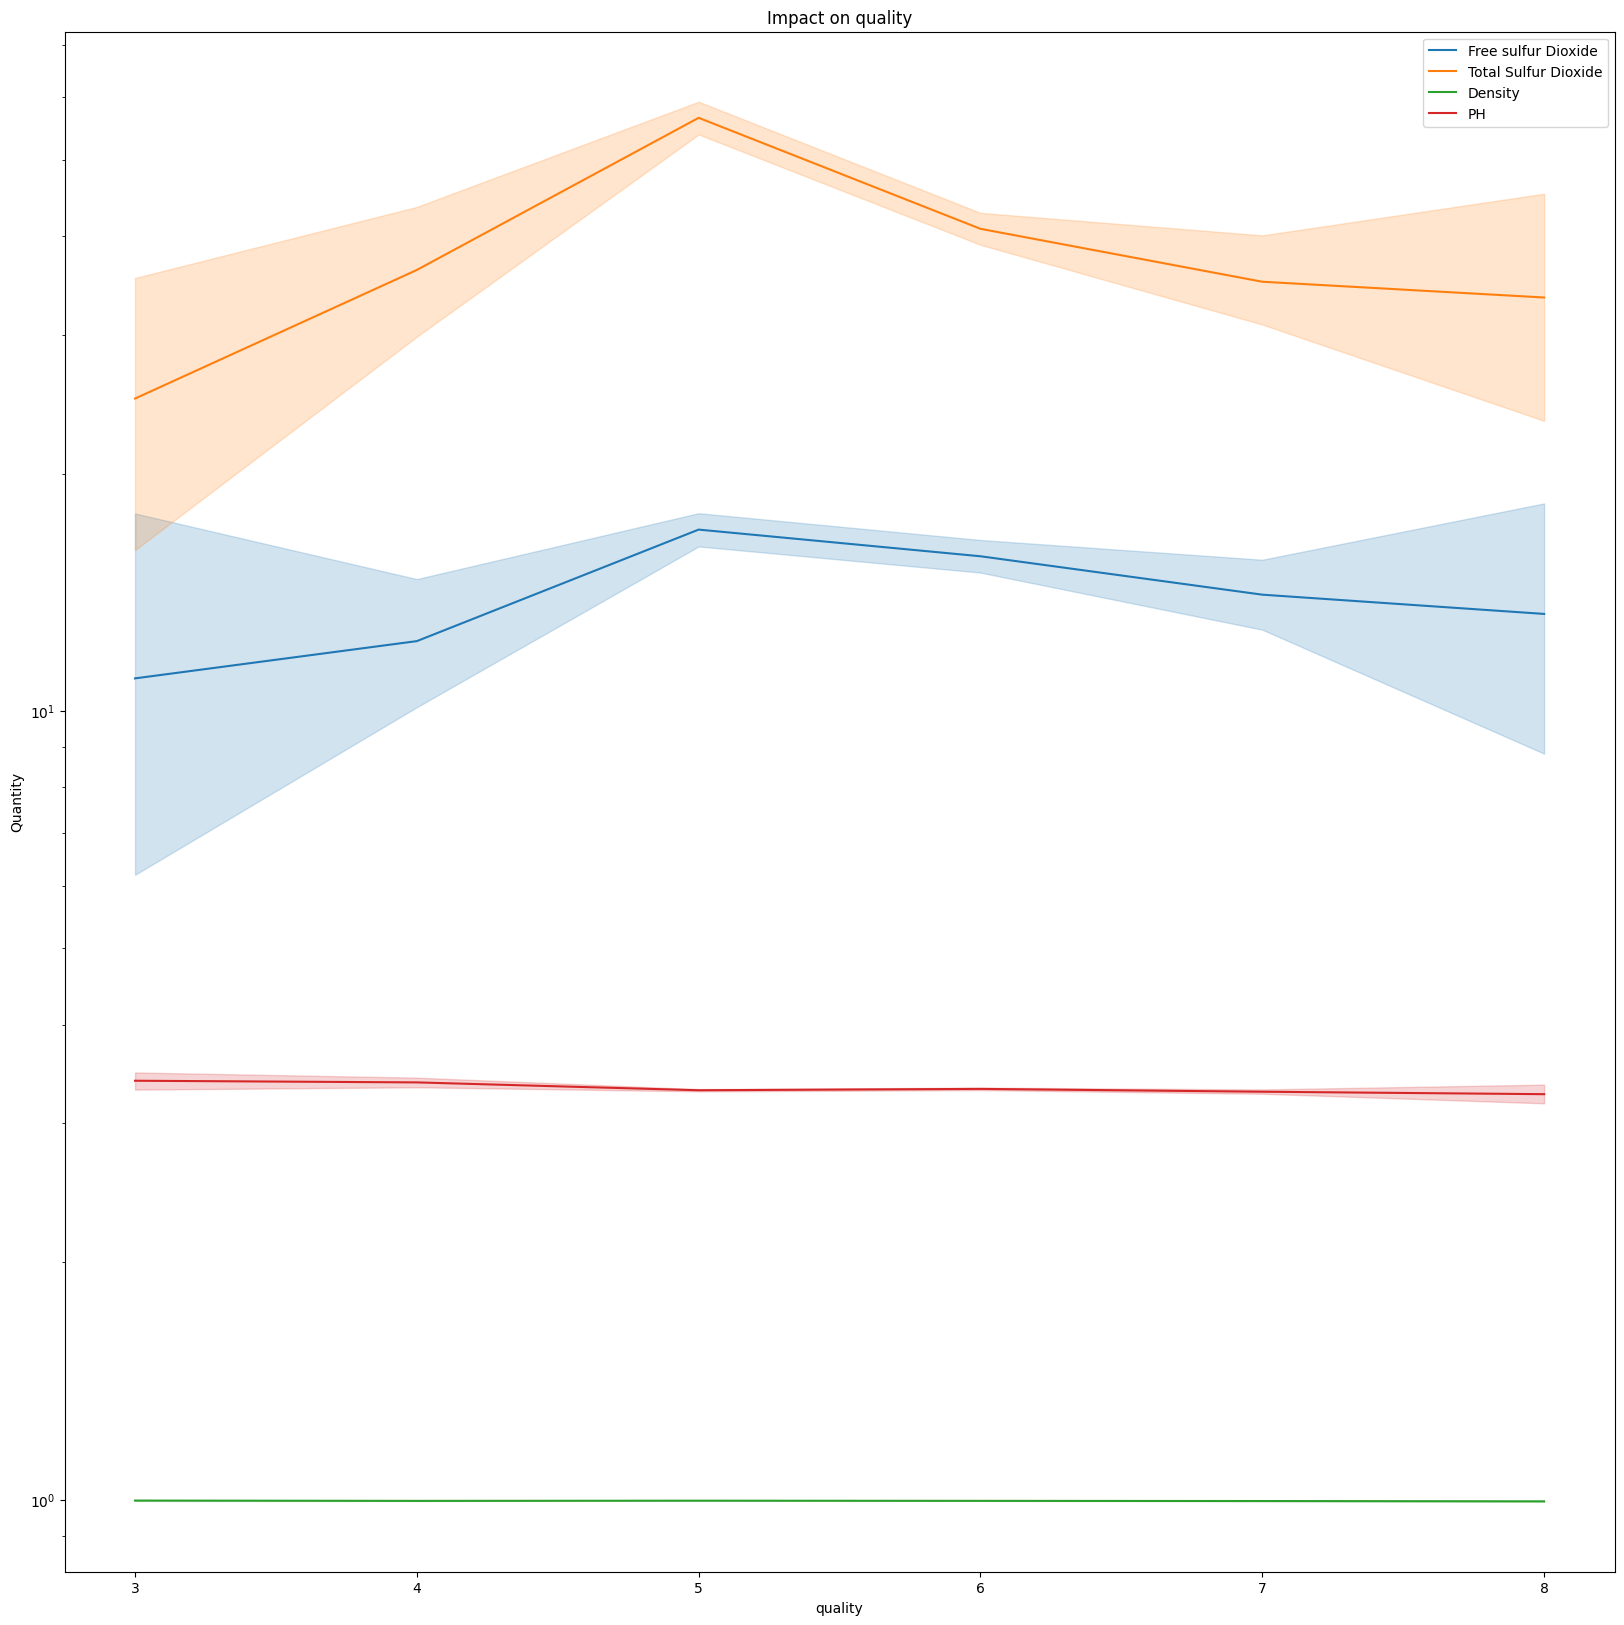

In [11]:
# Ploting only the less influential features

plt.figure(figsize=(20,20))
sns.lineplot(data=df1, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="density",label="Density")
sns.lineplot(data=df1, x="quality",y="pH",label="PH")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* Ploting again only the less influential features, we can conclude that *density* really low variation.
* Both *sulfur dioxide metrics* again show a low influence on quality.
* *pH* shows a very small correlation in relation to quality but declines steadly.

#### Correlation Heatmap

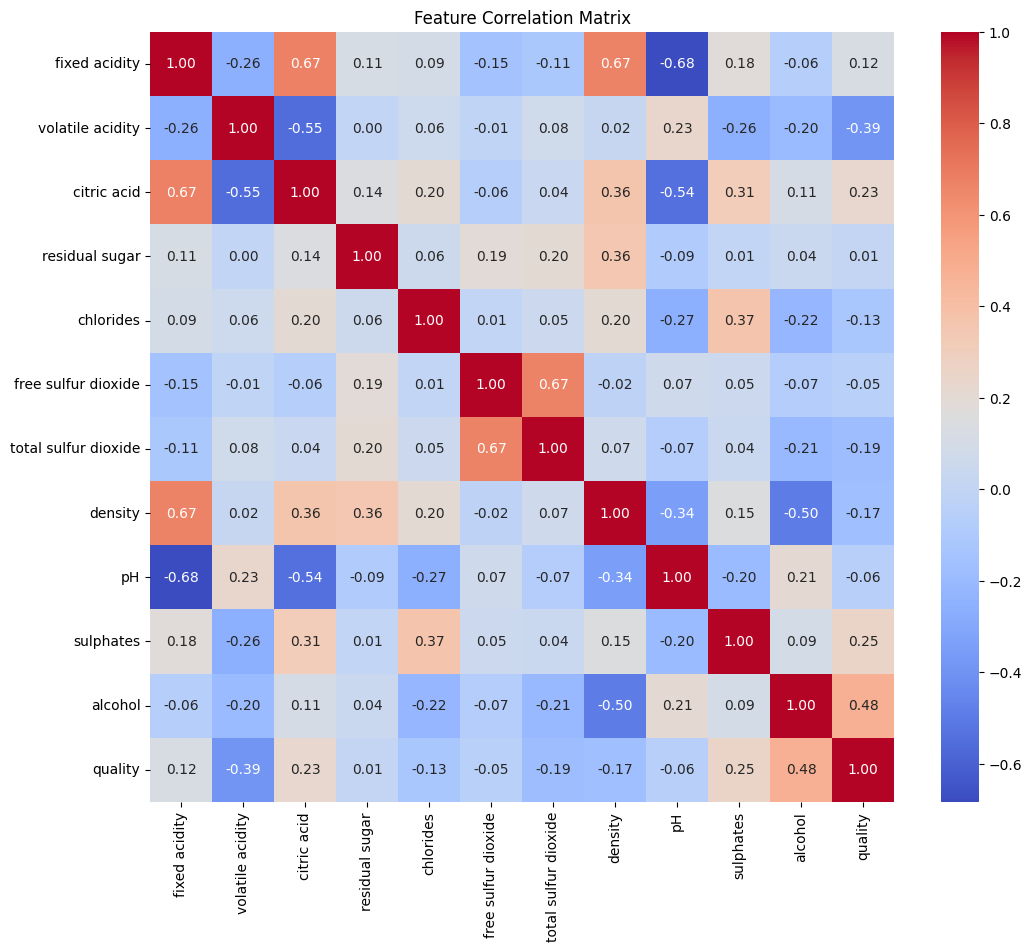

In [12]:
# Correlation Matrix to better analyse what features should be included in the dataset

corr_df1 = df1.corr().drop(index='wine_type', columns='wine_type')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df1, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:

Observing the heatmap we can observe that:

* *Alcohol* has the strongest positive correlation with *quality*: 0.48;
* *Sulphates* has a moderate positive correlation with *quality*: 0.25;
* *Citric Acid* has a weak positive correlation with *quality*: 0.23;
* *Volatile Acidity* has the strongest negative correlation with *quality*: -0.39;
* *Chlorides* has a weak negative correlation with *quality*: -0.13;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* show a weak negative correlation with *quality*: -0.05, -0.19 respectively;
---
* *Fixed Acidity <-> Citric Acid* show a strong positive correlation: 0.67;
* *Free Sulfur <-> Total Sulfur Dioxide* show a strong positive correlation: 0.67;
* *Fixed Acidity <-> Density* show a strong positive correlation: 0.67;
* *pH <-> Fixed Acidity* show a strong negative correlation: -0.68;

Analysing this data we can conclude that:

* *Alcohol* is a clear differentiator in wine quality;
* *Volatile Acidity* negative correlation with quality leads to high correlation to low quality wines;
* *Sulphates* are importante to diferentiate wine quality;
* *Citric Acid* can also contribute to diferentiate wine quality;
---
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* since they have high correlation between eachother and low correlation with *quality*, could be included only one.

#### Random Forest Feature Importance

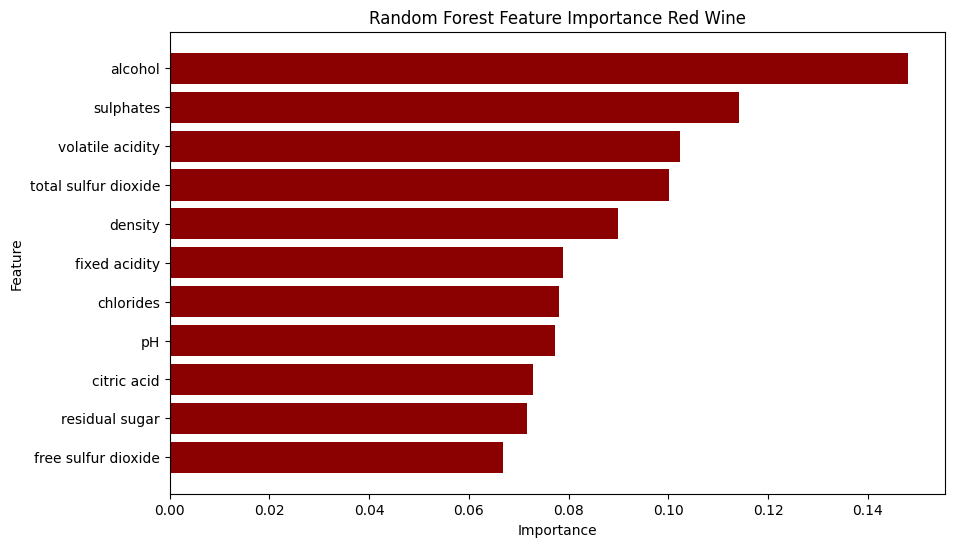

                 Feature  Importance
10               alcohol    0.147969
9              sulphates    0.114105
1       volatile acidity    0.102286
6   total sulfur dioxide    0.100200
7                density    0.089911
0          fixed acidity    0.078786
4              chlorides    0.078145
8                     pH    0.077227
2            citric acid    0.072870
3         residual sugar    0.071623
5    free sulfur dioxide    0.066878


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

def rffi_red():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train the Random Forest Classifier
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    
    # Get feature importance
    feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='darkred')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance Red Wine')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Display feature importance
    print(feature_importances)

rffi_red()


Analyzing the feature importance from the Random Forest model, we can observe that:

* *Alcohol* is the most important feature, with a feature importance value of 0.14;
* *Sulphates* is the second most important feature, with a value of 0.11, showing significant impact;
* *Total Sulfur Dioxide* has a moderate importance, with a value of 0.10;
* *Volatile Acidity* shows a significant impact with a feature importance of 0.10;
* *Density* contributes moderately, with an importance of 0.09;
* *pH* has moderate importance as well, with a value of 0.08;
* *Chlorides* and *Fixed Acidity* show weaker importance, with values of 0.08 and 0.07 respectively;
* *Residual Sugar* and *Free Sulfur Dioxide* are among the least important features, with values of 0.07 and 0.06.

---
Analysing this data we can conclude that:

* *Alcohol* is the most important differentiator in predicting wine quality;
* *Sulphates* are a strong contributor to differentiating wine quality;
* *Volatile Acidity* plays an important role, with its negative impact on quality making it a key factor in identifying low-quality wines;
* *Total Sulfur Dioxide* has a moderate influence, suggesting its indirect effect on quality;
* *Density* and *pH* can contribute moderately to quality prediction;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, due to their high correlation with each other and the low contribution of *Free Sulfur Dioxide*, could justify keeping only *Total Sulfur Dioxide* in the model;
* Features like *Residual Sugar*, *Fixed Acidity*, and *Chlorides* could potentially be deprioritized for prediction, as their contribution is weaker.


### White Wine

#### Plots of Feature Impact on Quality

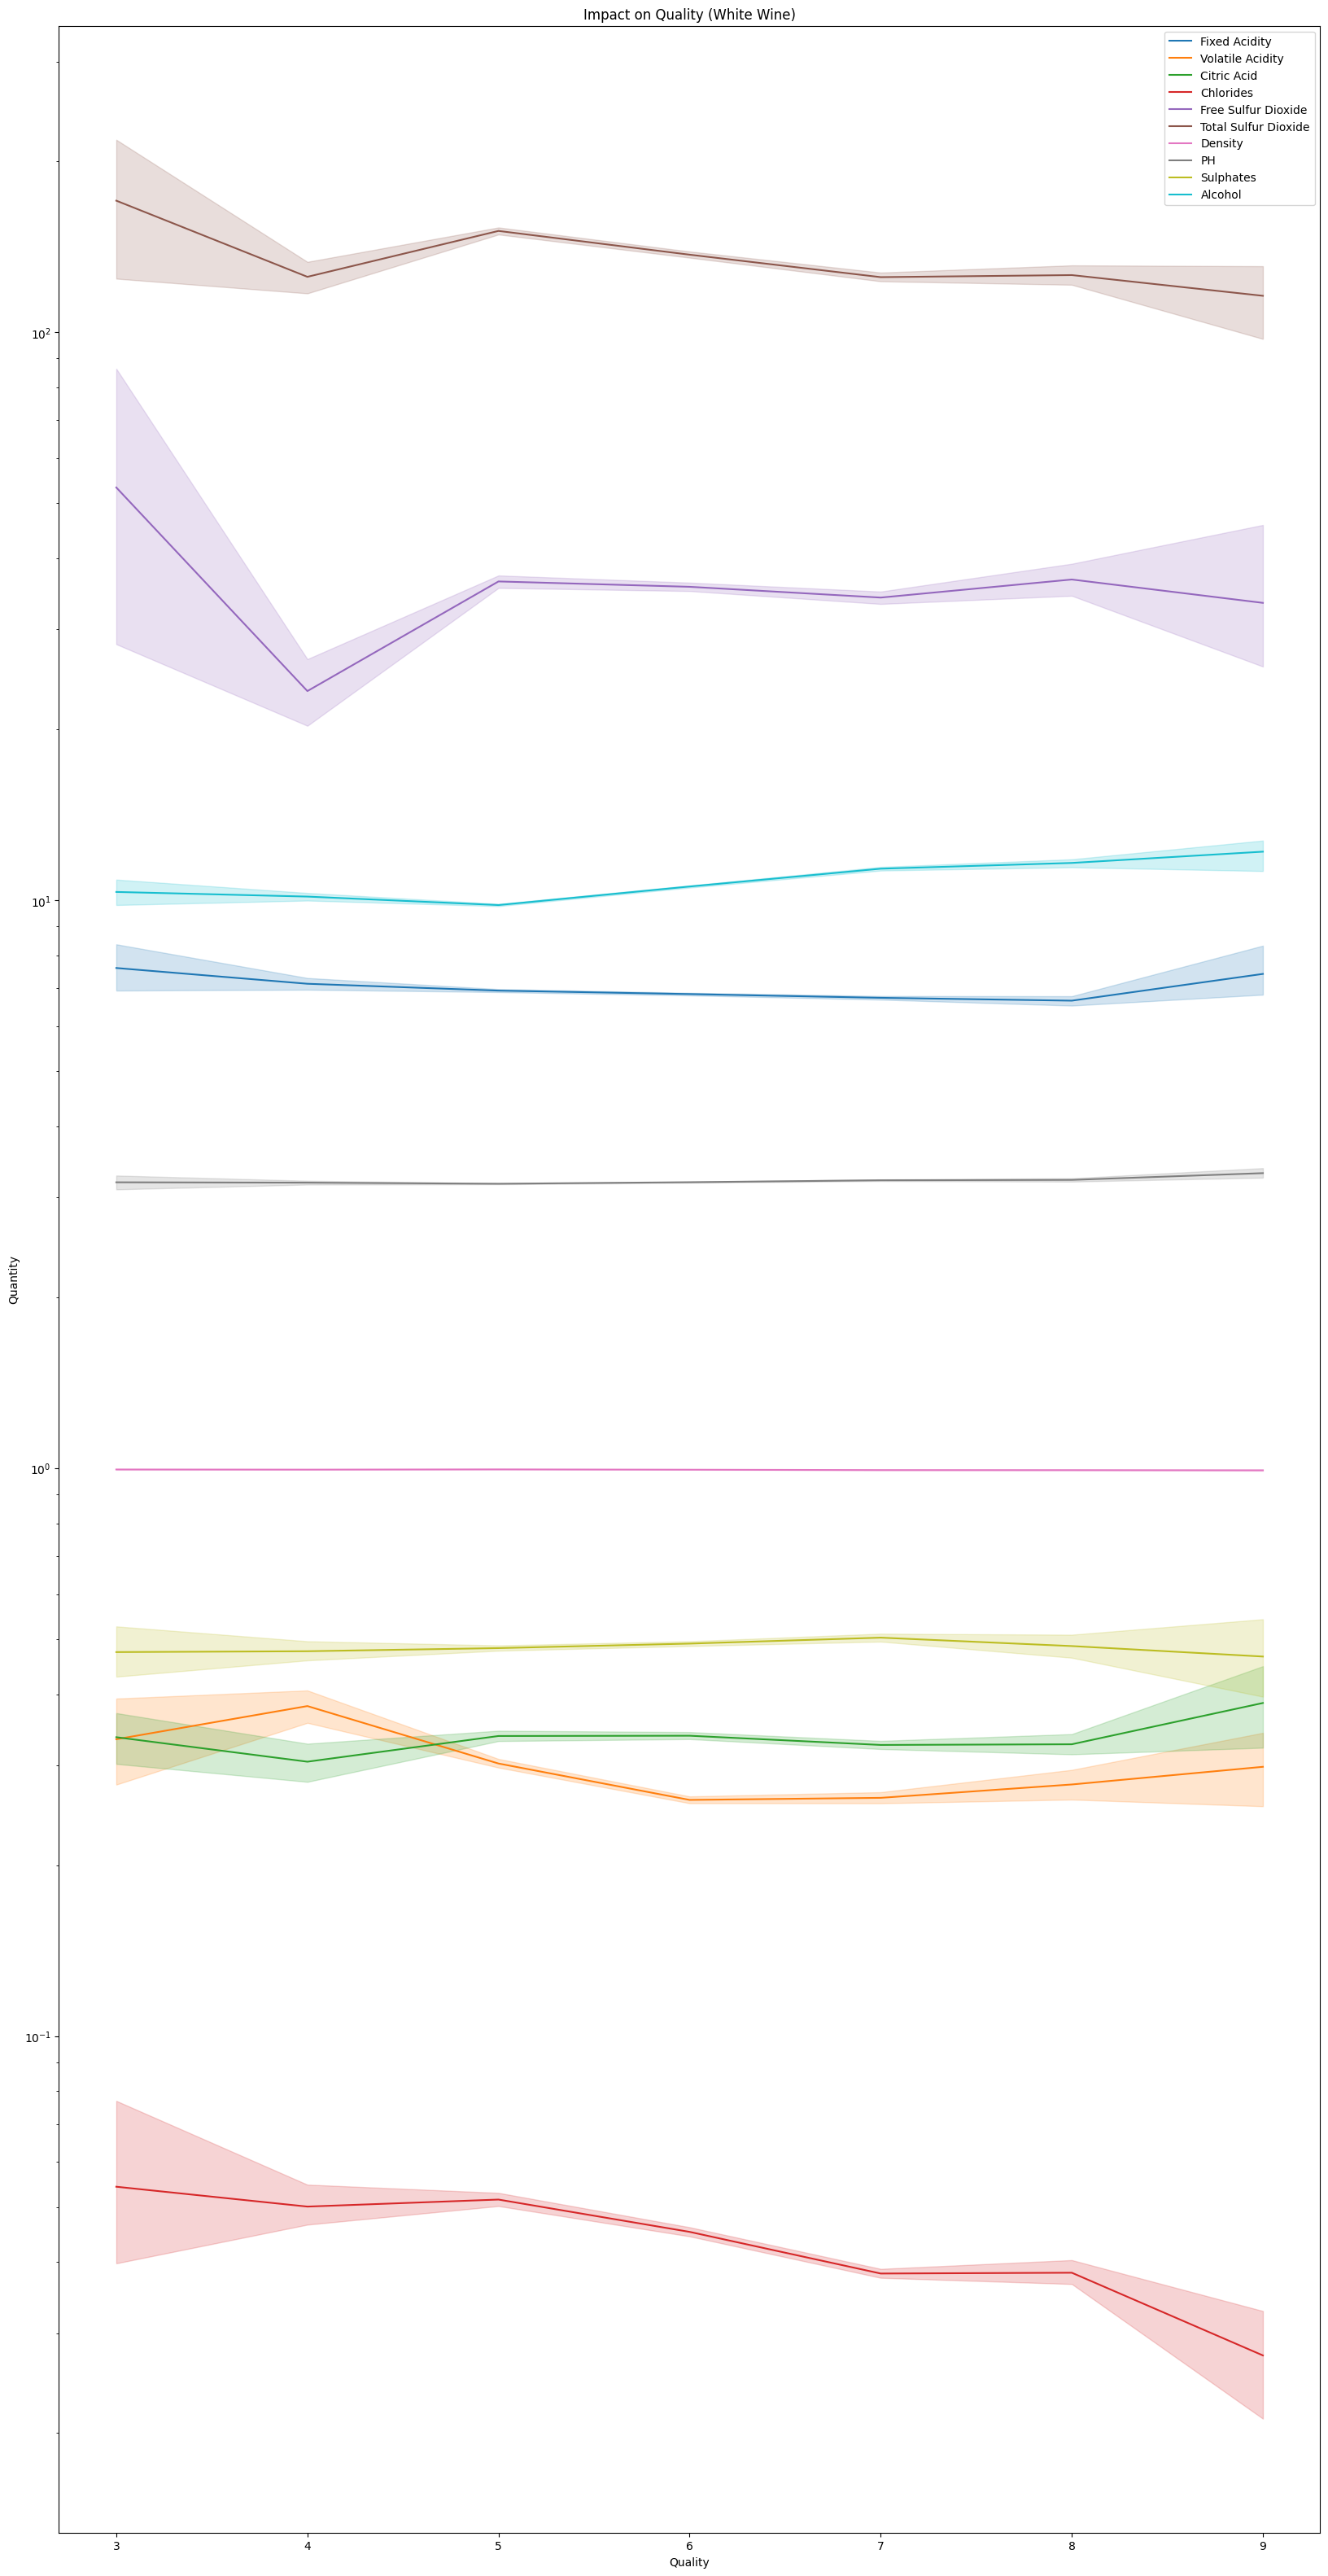

In [14]:
plt.figure(figsize=(20, 40))

sns.lineplot(data=df2, x="quality", y="fixed acidity", label="Fixed Acidity")
sns.lineplot(data=df2, x="quality", y="volatile acidity", label="Volatile Acidity")
sns.lineplot(data=df2, x="quality", y="citric acid", label="Citric Acid")
sns.lineplot(data=df2, x="quality", y="chlorides", label="Chlorides")
sns.lineplot(data=df2, x="quality", y="free sulfur dioxide", label="Free Sulfur Dioxide")
sns.lineplot(data=df2, x="quality", y="total sulfur dioxide", label="Total Sulfur Dioxide")
sns.lineplot(data=df2, x="quality", y="density", label="Density")
sns.lineplot(data=df2, x="quality", y="pH", label="PH")
sns.lineplot(data=df2, x="quality", y="sulphates", label="Sulphates")
sns.lineplot(data=df2, x="quality", y="alcohol", label="Alcohol")
plt.yscale('log') # Apply logarithmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.xlabel("Quality")
plt.title("Impact on Quality (White Wine)")
plt.legend()
plt.show()


* On a quick analysis we can observe that *alchool*, *sulphates*, and *citric acid* may have a positive correlation with wine quality.
* On the other hand, *volatile acidity* and *chlorides* show a negative trend as quality increases.
* The other features show less variation or show no influence with quality.

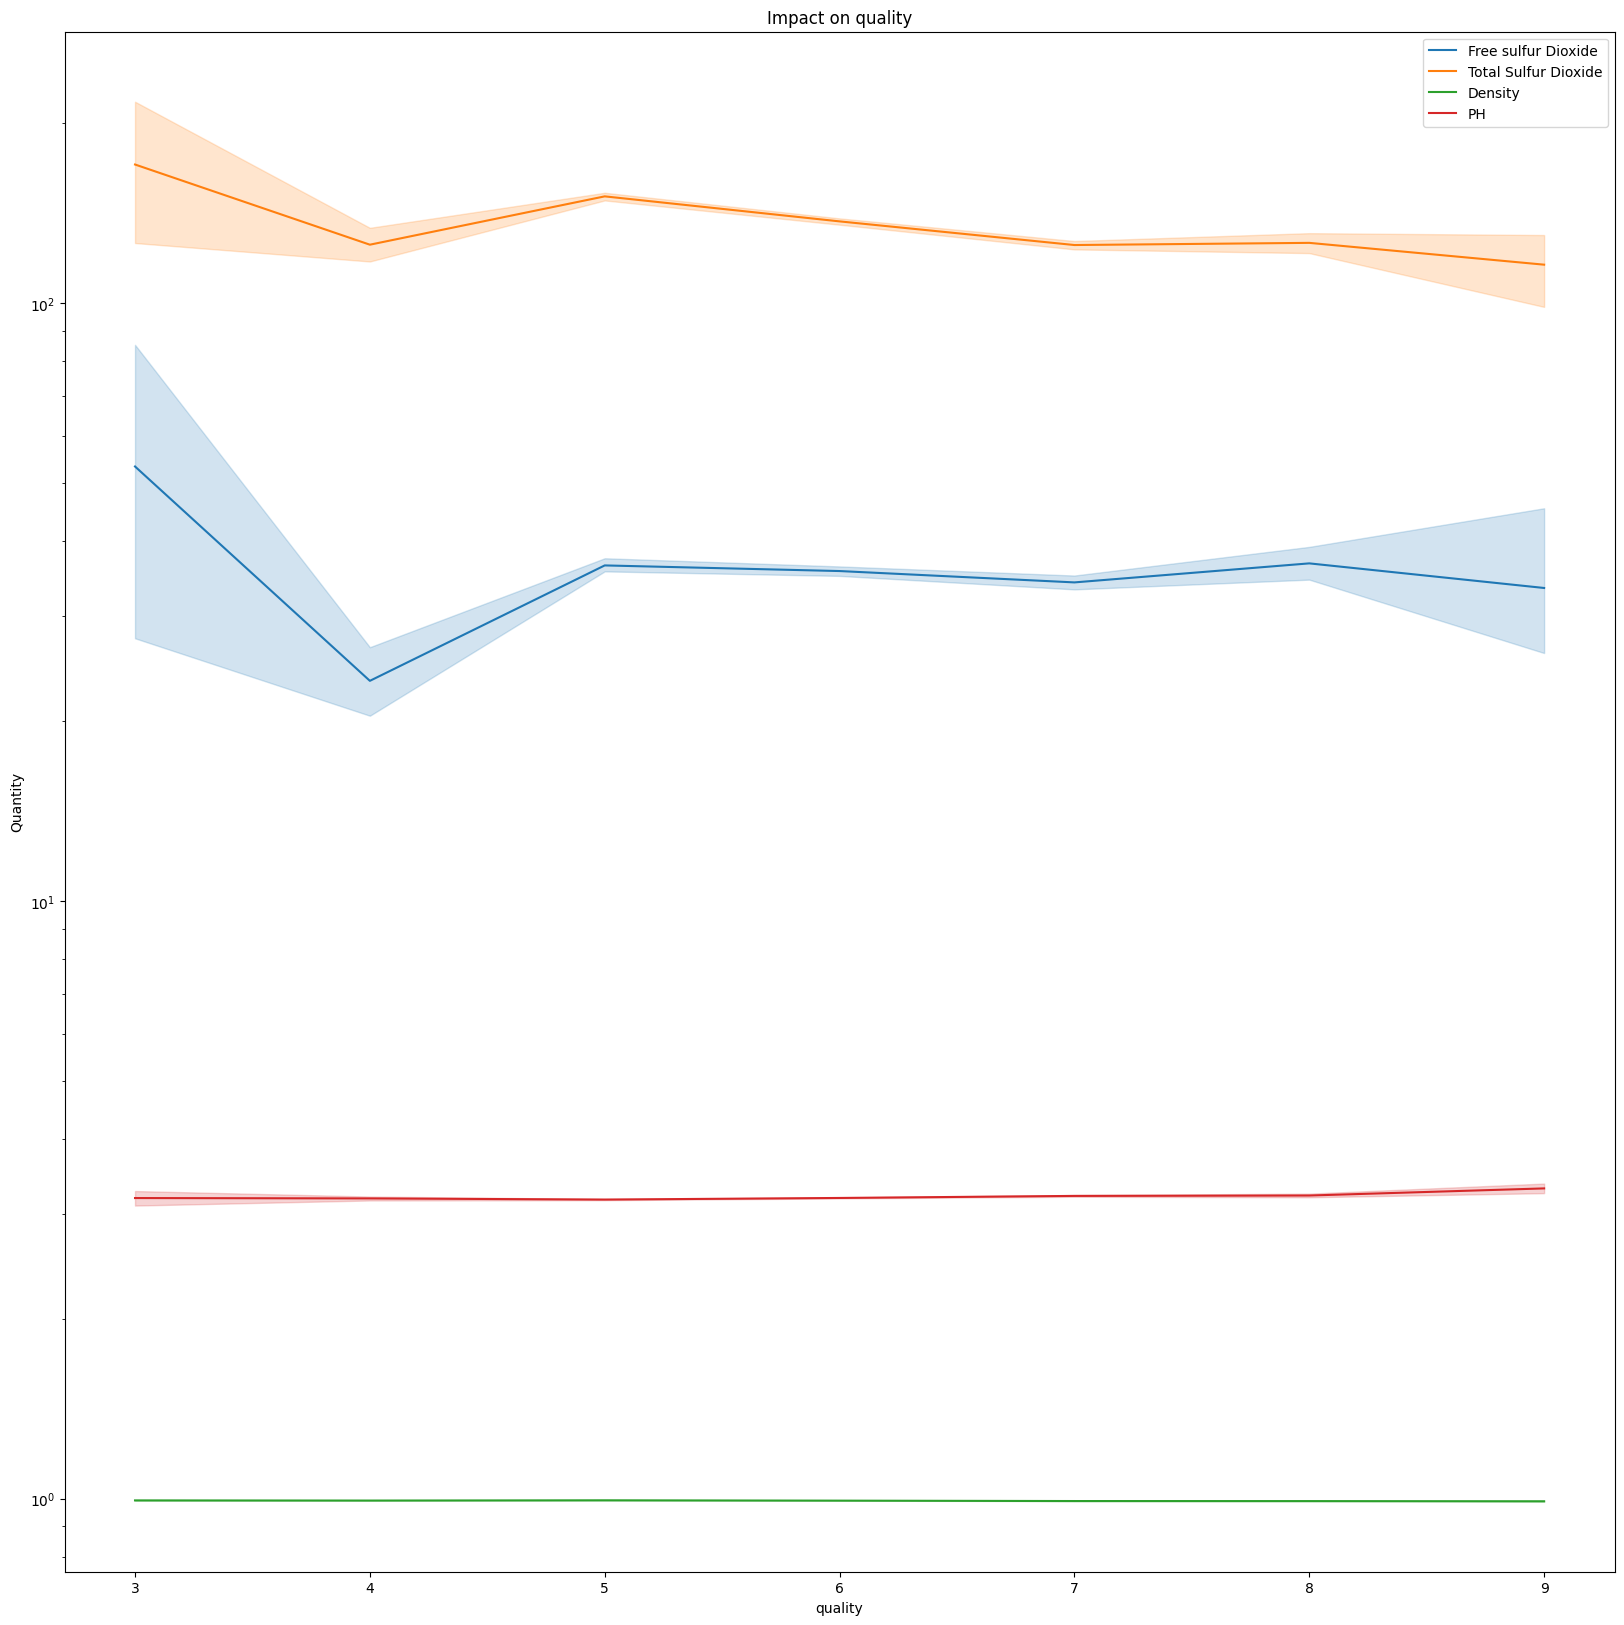

In [15]:
# Ploting only the less influential features

plt.figure(figsize=(20,20))
sns.lineplot(data=df2, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df2, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df2, x="quality",y="density",label="Density")
sns.lineplot(data=df2, x="quality",y="pH",label="PH")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* Ploting again only the less influential features, we can conclude that *density* shows very low variation.
* Both *sulfur dioxide metrics* again show a low influence on quality.
* *pH* shows a very small influence in relation to quality but declines steadly.

#### Correlation Heatmap

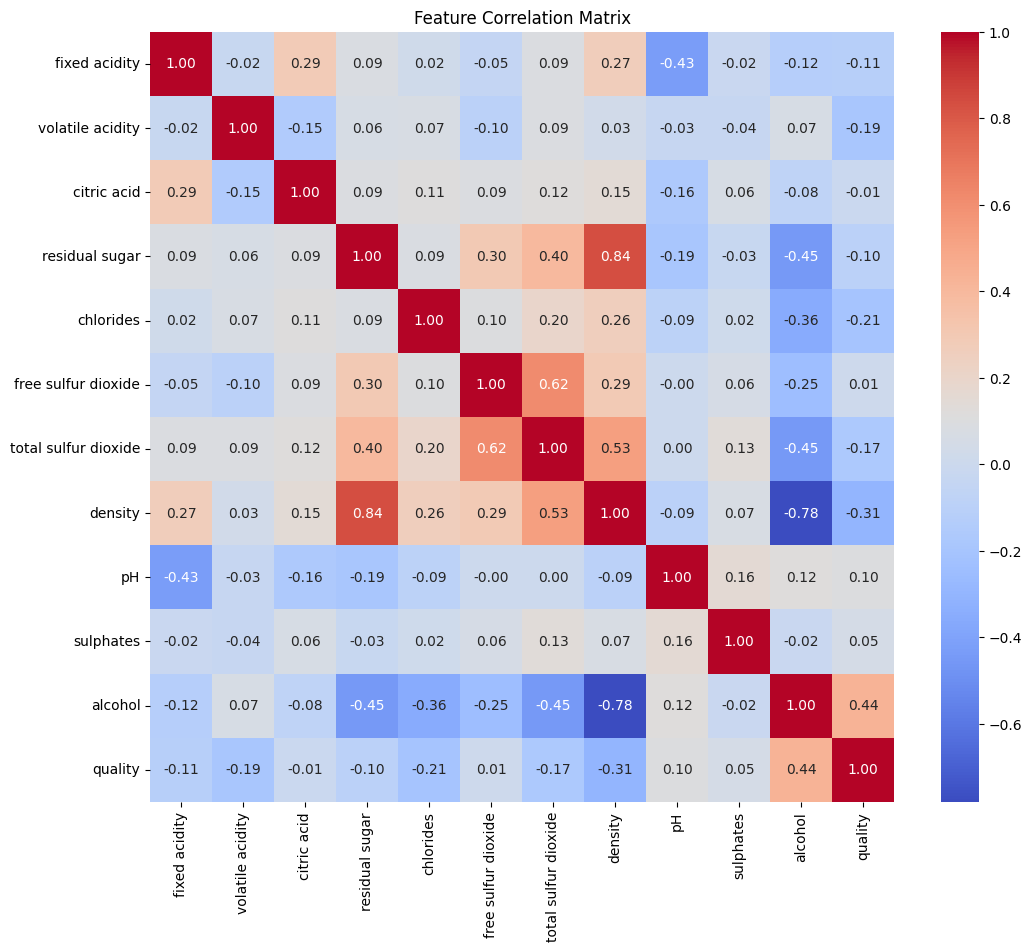

In [16]:
# Correlation Matrix to better analyse what features should be included in the dataset

corr_df2 = df2.corr().drop(index='wine_type', columns='wine_type')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

Observing the heatmap we can observe that:

* *Alcohol* has the strongest positive correlation with *quality*: 0.44;
* *Volatile Acidity* has a moderate negative correlation with *quality*: -0.19;
* *Density* has a moderate negative correlation with *quality*: -0.31;
* *Chlorides* has a weak negative correlation with *quality*: -0.21;
* *Total Sulfur Dioxide* has a weak negative correlation with *quality*: -0.17;
* *Free Sulfur Dioxide*, *pH*, *Citric Acid*, *Fixed Acidity*, and *Residual Sugar* show little to no correlation with *quality*: -0.05, 0.00, -0.11, and -0.10, respectively.

---

* *Residual Sugar <-> Density* show a strong positive correlation: 0.84;
* *Free Sulfur Dioxide <-> Total Sulfur Dioxide* show a moderate positive correlation: 0.62;
* *pH <-> Fixed Acidity* show a strong negative correlation: -0.43.

---

Analyzing this data we can conclude that:

* *Alcohol* is a strong differentiator in wine quality due to its significant positive correlation;
* *Volatile Acidity* and *Density* are sugest they can be usefull predictors of wine quality due to their moderate negative correlations;
* *Chlorides* and *Total Sulfur Dioxide* contribute weakly but could still help differentiate wine quality;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, due to their moderate correlation with each other and weak impact on *quality*, suggest that only one of them should be included;
* *pH*, *Fixed Acidity*, *Citric Acid* and *Residual Sugar* have minimal impact on *quality* and could be deprioritized.


#### Random Forest Feature Impact

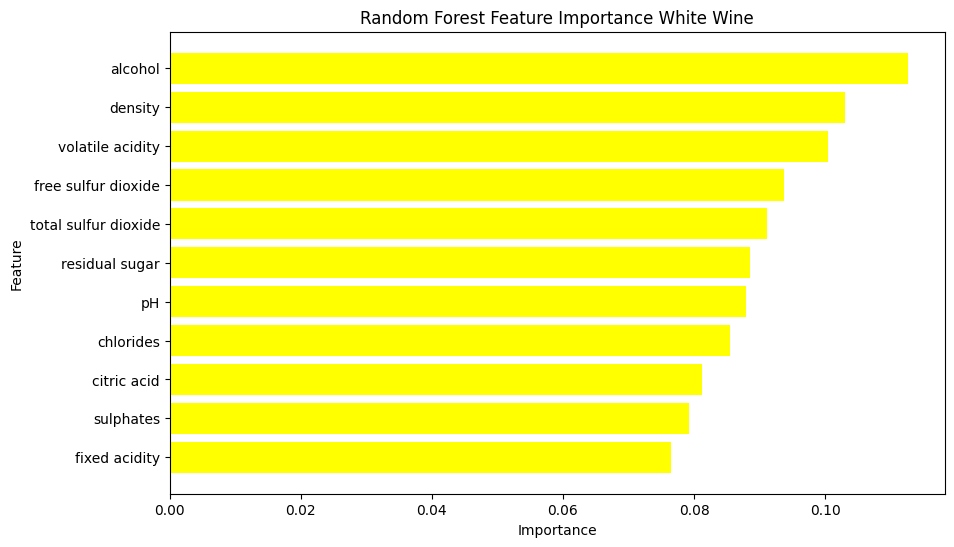

                 Feature  Importance
10               alcohol    0.112605
7                density    0.103044
1       volatile acidity    0.100450
5    free sulfur dioxide    0.093767
6   total sulfur dioxide    0.091105
3         residual sugar    0.088596
8                     pH    0.087975
4              chlorides    0.085530
2            citric acid    0.081229
9              sulphates    0.079225
0          fixed acidity    0.076472


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

def rffi_white():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train the Random Forest Classifier
    rf2 = RandomForestClassifier(random_state=1)
    rf2.fit(X_train, y_train)
    
    # Get feature importance
    feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf2.feature_importances_}).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='yellow')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance White Wine')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Display feature importance
    print(feature_importances)

rffi_white()


Analyzing the feature importance from the Random Forest model for white wine, we can observe that:

* *Alcohol* is the most important feature, with a feature importance value of 0.11;
* *Density* is the second most important feature, with a value of 0.10, showing significant impact;
* *Volatile Acidity* shows a significant impact with a feature importance of 0.10;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* have moderate importance, with a value of 0.09;
* *Residual Sugar* has a slightly lower importance, with a value of 0.08;
* *pH* and *Chlorides* contribute weakly, with values of 0.08 and 0.08 respectively;
* *Citric Acid* and *Sulphates* show weaker importance, with values of 0.08 and 0.08;
* *Fixed Acidity* is among the least important features, with a value of 0.07;

---

Analyzing this data we can conclude that:

* *Alcohol* is the most important differentiator in predicting wine quality;
* *Density* and *Volatile Acidity* are strong contributors to differentiating wine quality;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, despite their moderate importance, could overlap in information, suggesting that only one might be kept;
* *Residual Sugar* plays a moderate role and contributes indirectly;
* *pH* and *Chlorides* provide weak predictive power but might still be retained for interaction effects;
* *Citric Acid*, *Sulphates*, and *Fixed Acidity* contribute minimally to quality predictions and could potentially be deprioritized.


## Feature Selection

Using the information obtained from the previous feature analysis, we can conclude:

* Even though *Density* shows big importance in the REFI, since it is constant across different qualities as shown when ploted, it shouldn't be used as a feature in the classification task.
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* to this problem are redudant, since *Free Sulfur Dioxide* is included *Total Sulfur Dioxide* measurement. So only *Total Sulfur Dioxide* should be included.
* Even tought in White Wine, *Citric Acid* shows low correlation to *Quality* it still should be included since it has a moderate negative correlation to quality in Red Wine.

So, the final selected features for **Red Wine** are:

* Alcohol;
* Density;
* Sulphates;
* Volatile Acidity;
* Total Sulfur Dioxide;
* Fixed Acidity;
* Chlorides.

So, the final selected features for **White Wine** are:

* Alcohol;
* Density;
* Volatile Acidity;
* Total Sulfur Dioxide;
* Chlorides;
* Residual Sugar;
* pH.


## Classifier Full Dataset

### Computation time tracker function

In [47]:
# Main imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt #same as import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [28]:
import time
from sklearn.metrics import accuracy_score, f1_score
def comp_time_eval(model, X_train, X_test, y_train, y_test):
    
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()
    
    print(rep)

    return {'Training Time (s)': training_time,'Inference Time (s)': inference_time}, training_time, inference_time


### Red Wine

#### Decision Tree Classifier - selected features

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

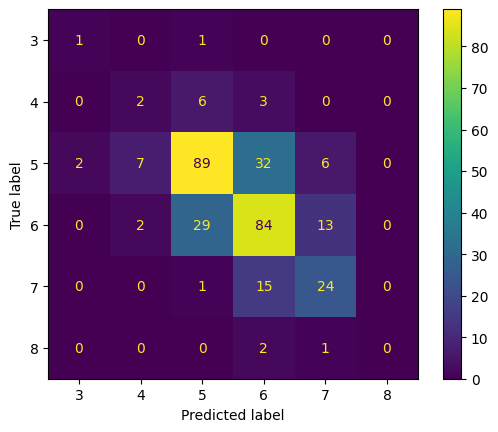

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.18      0.18      0.18        11
           5       0.71      0.65      0.68       136
           6       0.62      0.66      0.64       128
           7       0.55      0.60      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.40      0.43      0.41       320
weighted avg       0.62      0.62      0.62       320

{'Training Time (s)': 0.0067, 'Inference Time (s)': 0.00072}


(0.0067, 0.00072)

In [25]:
def RedDTC():
    X = df1[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC()

#### Decision Tree Classifier - all features

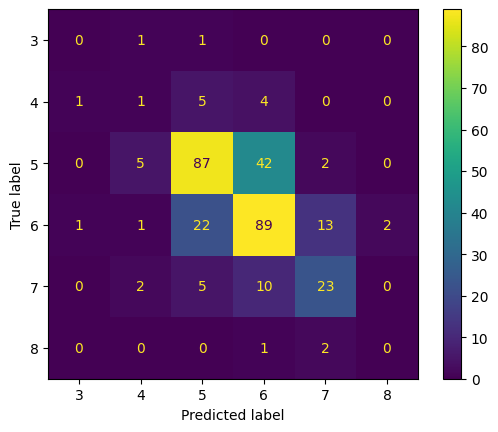

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.72      0.64      0.68       136
           6       0.61      0.70      0.65       128
           7       0.57      0.57      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.62      0.62       320

{'Training Time (s)': 0.00913, 'Inference Time (s)': 0.00072}


(0.00913, 0.00072)

In [31]:
def RedDTC2():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC2()

#### Random Tree Classifier - selected features

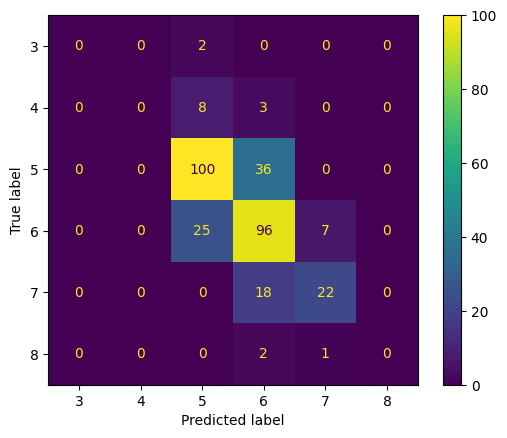

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.62      0.75      0.68       128
           7       0.73      0.55      0.63        40
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.65      0.68      0.66       320

{'Training Time (s)': 0.94857, 'Inference Time (s)': 0.02574}


(0.94857, 0.02574)

In [26]:
def RedRTC():
    X = df1[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC()

#### Random Tree Classifier - all features

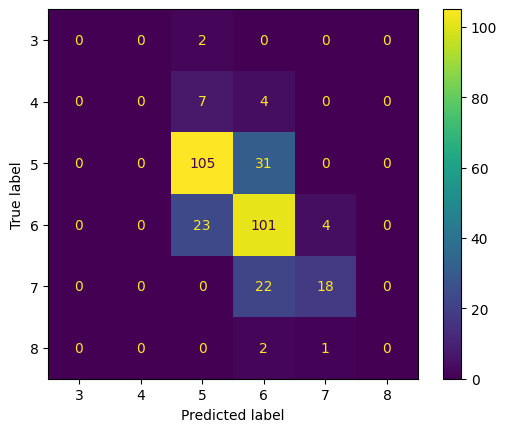

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.77      0.77       136
           6       0.63      0.79      0.70       128
           7       0.78      0.45      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.36      0.34      0.34       320
weighted avg       0.68      0.70      0.68       320

{'Training Time (s)': 1.04754, 'Inference Time (s)': 0.0258}


(1.04754, 0.0258)

In [71]:
def RedRTC2():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC2()

### White Wine

#### Decision Tree Classifier - selected features

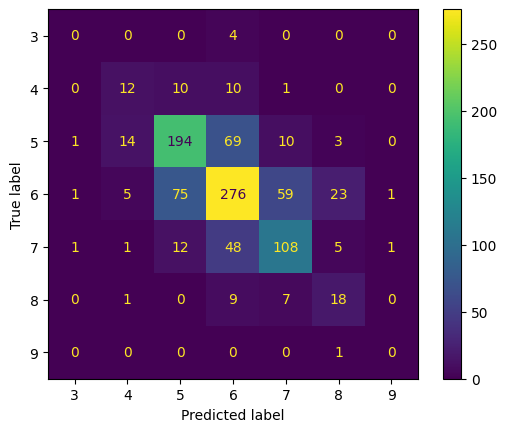

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.36      0.36      0.36        33
           5       0.67      0.67      0.67       291
           6       0.66      0.63      0.64       440
           7       0.58      0.61      0.60       176
           8       0.36      0.51      0.42        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.38      0.40      0.39       980
weighted avg       0.63      0.62      0.62       980

{'Training Time (s)': 0.02085, 'Inference Time (s)': 0.00082}


(0.02085, 0.00082)

In [42]:
def WhiteDTC():
    X = df2[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]
    
WhiteDTC()

#### Decision Tree Classifier - all features

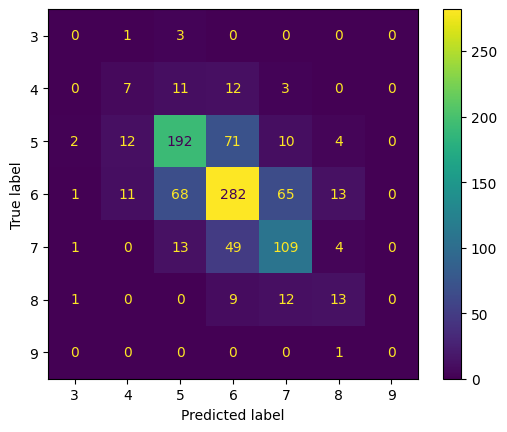

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.23      0.21      0.22        33
           5       0.67      0.66      0.66       291
           6       0.67      0.64      0.65       440
           7       0.55      0.62      0.58       176
           8       0.37      0.37      0.37        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.35      0.36      0.36       980
weighted avg       0.62      0.62      0.62       980

{'Training Time (s)': 0.03132, 'Inference Time (s)': 0.00091}


(0.03132, 0.00091)

In [72]:
def WhiteDTC2():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteDTC2()

#### Random Tree Classifier - selected features

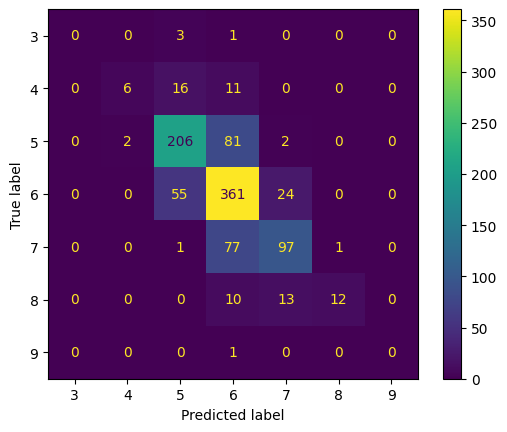

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.75      0.18      0.29        33
           5       0.73      0.71      0.72       291
           6       0.67      0.82      0.74       440
           7       0.71      0.55      0.62       176
           8       0.92      0.34      0.50        35
           9       0.00      0.00      0.00         1

    accuracy                           0.70       980
   macro avg       0.54      0.37      0.41       980
weighted avg       0.70      0.70      0.68       980

{'Training Time (s)': 2.217, 'Inference Time (s)': 0.06254}


(2.217, 0.06254)

In [41]:
def WhiteRTC():
    X = df2[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC()

#### Random Tree Classifier - all features

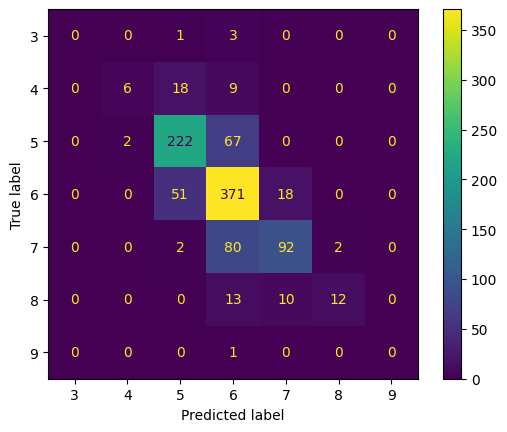

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.75      0.18      0.29        33
           5       0.76      0.76      0.76       291
           6       0.68      0.84      0.75       440
           7       0.77      0.52      0.62       176
           8       0.86      0.34      0.49        35
           9       0.00      0.00      0.00         1

    accuracy                           0.72       980
   macro avg       0.54      0.38      0.42       980
weighted avg       0.72      0.72      0.70       980

{'Training Time (s)': 2.95063, 'Inference Time (s)': 0.05945}


(2.95063, 0.05945)

In [44]:
def WhiteRTC2():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC2()

## Classifier Half Dataset

### Red Wine

#### Decision Tree Classifier - selected features

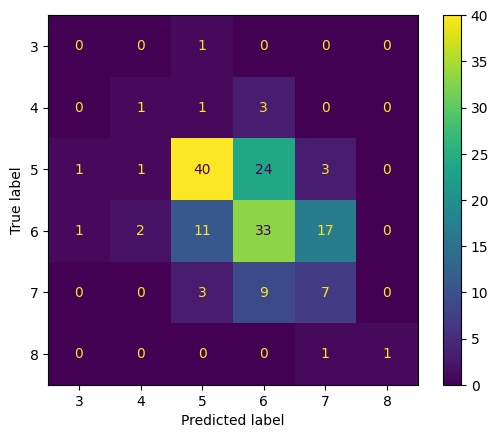

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22         5
           5       0.71      0.58      0.64        69
           6       0.48      0.52      0.50        64
           7       0.25      0.37      0.30        19
           8       1.00      0.50      0.67         2

    accuracy                           0.51       160
   macro avg       0.45      0.36      0.39       160
weighted avg       0.55      0.51      0.53       160

{'Training Time (s)': 0.00588, 'Inference Time (s)': 0.00089}


(0.00588, 0.00089)

In [53]:
def RedDTCr():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTCr()

#### Decision Tree Classifier - all features

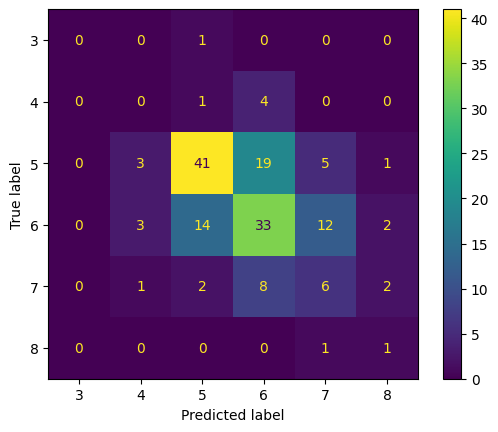

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.69      0.59      0.64        69
           6       0.52      0.52      0.52        64
           7       0.25      0.32      0.28        19
           8       0.17      0.50      0.25         2

    accuracy                           0.51       160
   macro avg       0.27      0.32      0.28       160
weighted avg       0.54      0.51      0.52       160

{'Training Time (s)': 0.00577, 'Inference Time (s)': 0.00067}


(0.00577, 0.00067)

In [54]:
def RedDTC2r():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced.drop(columns=['quality','wine_type'])
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC2r()

#### Random Tree Classifier - selected features

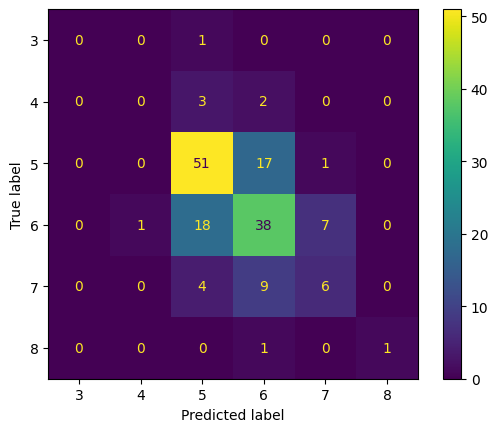

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.74      0.70        69
           6       0.57      0.59      0.58        64
           7       0.43      0.32      0.36        19
           8       1.00      0.50      0.67         2

    accuracy                           0.60       160
   macro avg       0.44      0.36      0.38       160
weighted avg       0.58      0.60      0.58       160

{'Training Time (s)': 0.56776, 'Inference Time (s)': 0.01817}


(0.56776, 0.01817)

In [56]:
def RedRTCr():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTCr()

#### Random Tree Classifier - all features

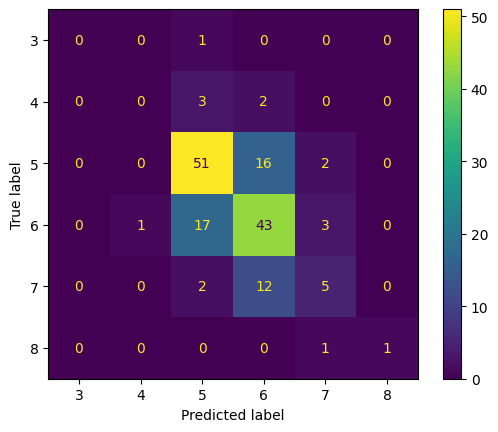

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.69      0.74      0.71        69
           6       0.59      0.67      0.63        64
           7       0.45      0.26      0.33        19
           8       1.00      0.50      0.67         2

    accuracy                           0.62       160
   macro avg       0.46      0.36      0.39       160
weighted avg       0.60      0.62      0.61       160

{'Training Time (s)': 0.69261, 'Inference Time (s)': 0.01724}


(0.69261, 0.01724)

In [58]:
def RedRTC2r():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced.drop(columns=['quality','wine_type'])
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC2r()

### White Wine

#### Decision Tree Classifier - selected features

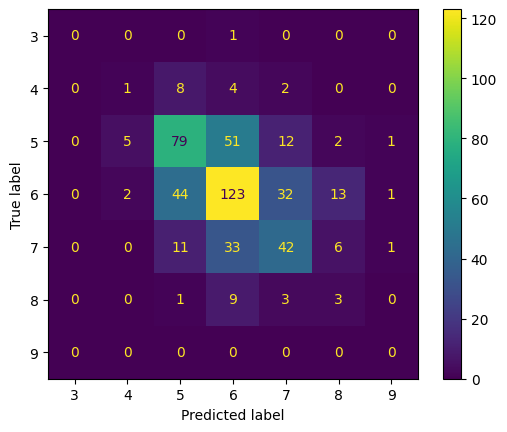

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.07      0.09        15
           5       0.55      0.53      0.54       150
           6       0.56      0.57      0.56       215
           7       0.46      0.45      0.46        93
           8       0.12      0.19      0.15        16
           9       0.00      0.00      0.00         0

    accuracy                           0.51       490
   macro avg       0.26      0.26      0.26       490
weighted avg       0.51      0.51      0.51       490

{'Training Time (s)': 0.01119, 'Inference Time (s)': 0.00068}


(0.01119, 0.00068)

In [64]:
def WhiteDTCr():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]
    
WhiteDTCr()

#### Decision Tree Classifier - all features

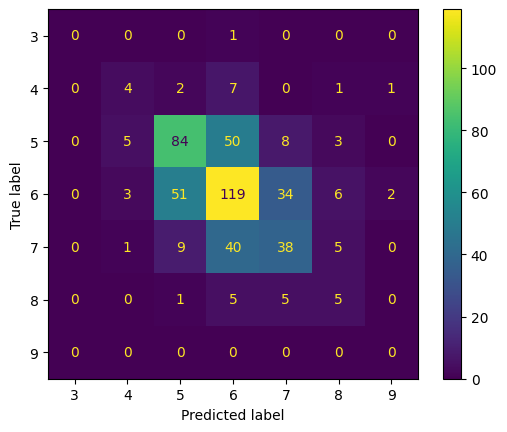

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.31      0.27      0.29        15
           5       0.57      0.56      0.57       150
           6       0.54      0.55      0.54       215
           7       0.45      0.41      0.43        93
           8       0.25      0.31      0.28        16
           9       0.00      0.00      0.00         0

    accuracy                           0.51       490
   macro avg       0.30      0.30      0.30       490
weighted avg       0.51      0.51      0.51       490

{'Training Time (s)': 0.01661, 'Inference Time (s)': 0.00075}


(0.01661, 0.00075)

In [69]:
def WhiteDTC2r():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced.drop(columns=['quality','wine_type'])
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteDTC2r()

#### Random Tree Classifier - selected features

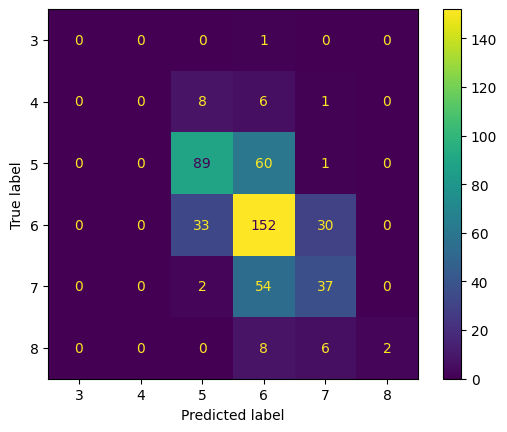

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.67      0.59      0.63       150
           6       0.54      0.71      0.61       215
           7       0.49      0.40      0.44        93
           8       1.00      0.12      0.22        16

    accuracy                           0.57       490
   macro avg       0.45      0.30      0.32       490
weighted avg       0.57      0.57      0.55       490

{'Training Time (s)': 1.22749, 'Inference Time (s)': 0.03358}


(1.22749, 0.03358)

In [70]:
def WhiteRTCr():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTCr()

#### Random Tree Classifier - all features

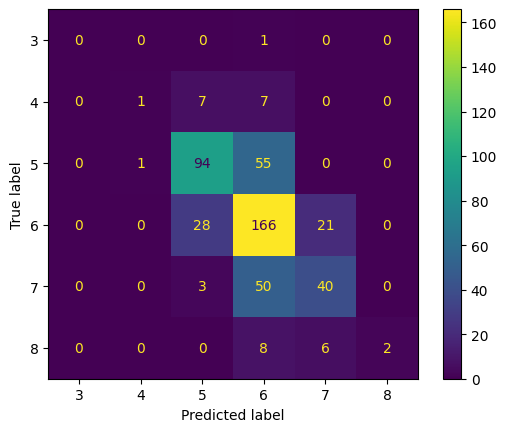

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.07      0.12        15
           5       0.71      0.63      0.67       150
           6       0.58      0.77      0.66       215
           7       0.60      0.43      0.50        93
           8       1.00      0.12      0.22        16

    accuracy                           0.62       490
   macro avg       0.56      0.34      0.36       490
weighted avg       0.63      0.62      0.60       490

{'Training Time (s)': 1.55788, 'Inference Time (s)': 0.03268}


(1.55788, 0.03268)

In [67]:
def WhiteRTC2r():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced.drop(columns=['quality','wine_type'])
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC2r()